---
title: "reactivity"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
  pdf:
    include-in-header:
      - text: |
          \usepackage{bm}
          \usepackage{amsmath}
          \usepackage{unicode-math}
          \usepackage{mathtools}
    latex-auto-install: true
filters:
  - diagram
diagram:
  engine:
    tikz:
      execpath: lualatex
      header-includes:
        - '\usepackage{adjustbox}'
        - '\usetikzlibrary{arrows, shapes}'
---

## a 1d linear dynamical system

$$
\frac{dx}{dt} = ax
$$

whose solution is

$$
x(t) = x_0 e^{at}
$$

In [2]:
#| code-summary: "import stuff"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
# %matplotlib widget

In [3]:
#| code-summary: "1d system"

def equation_1d(a, x):
    return [a * x]

# parameters as a dictionary
a1 = -1.0
a2 = +0.3

tmax=6
dt=0.01
x0 = 1.0
t_eval = np.arange(0, tmax, dt)

# solve the system

sol1 = solve_ivp(lambda t, y: equation_1d(a1, y),
                 [0, tmax], [x0], t_eval=t_eval)
sol2 = solve_ivp(lambda t, y: equation_1d(a2, y),
                 [0, tmax], [x0], t_eval=t_eval)



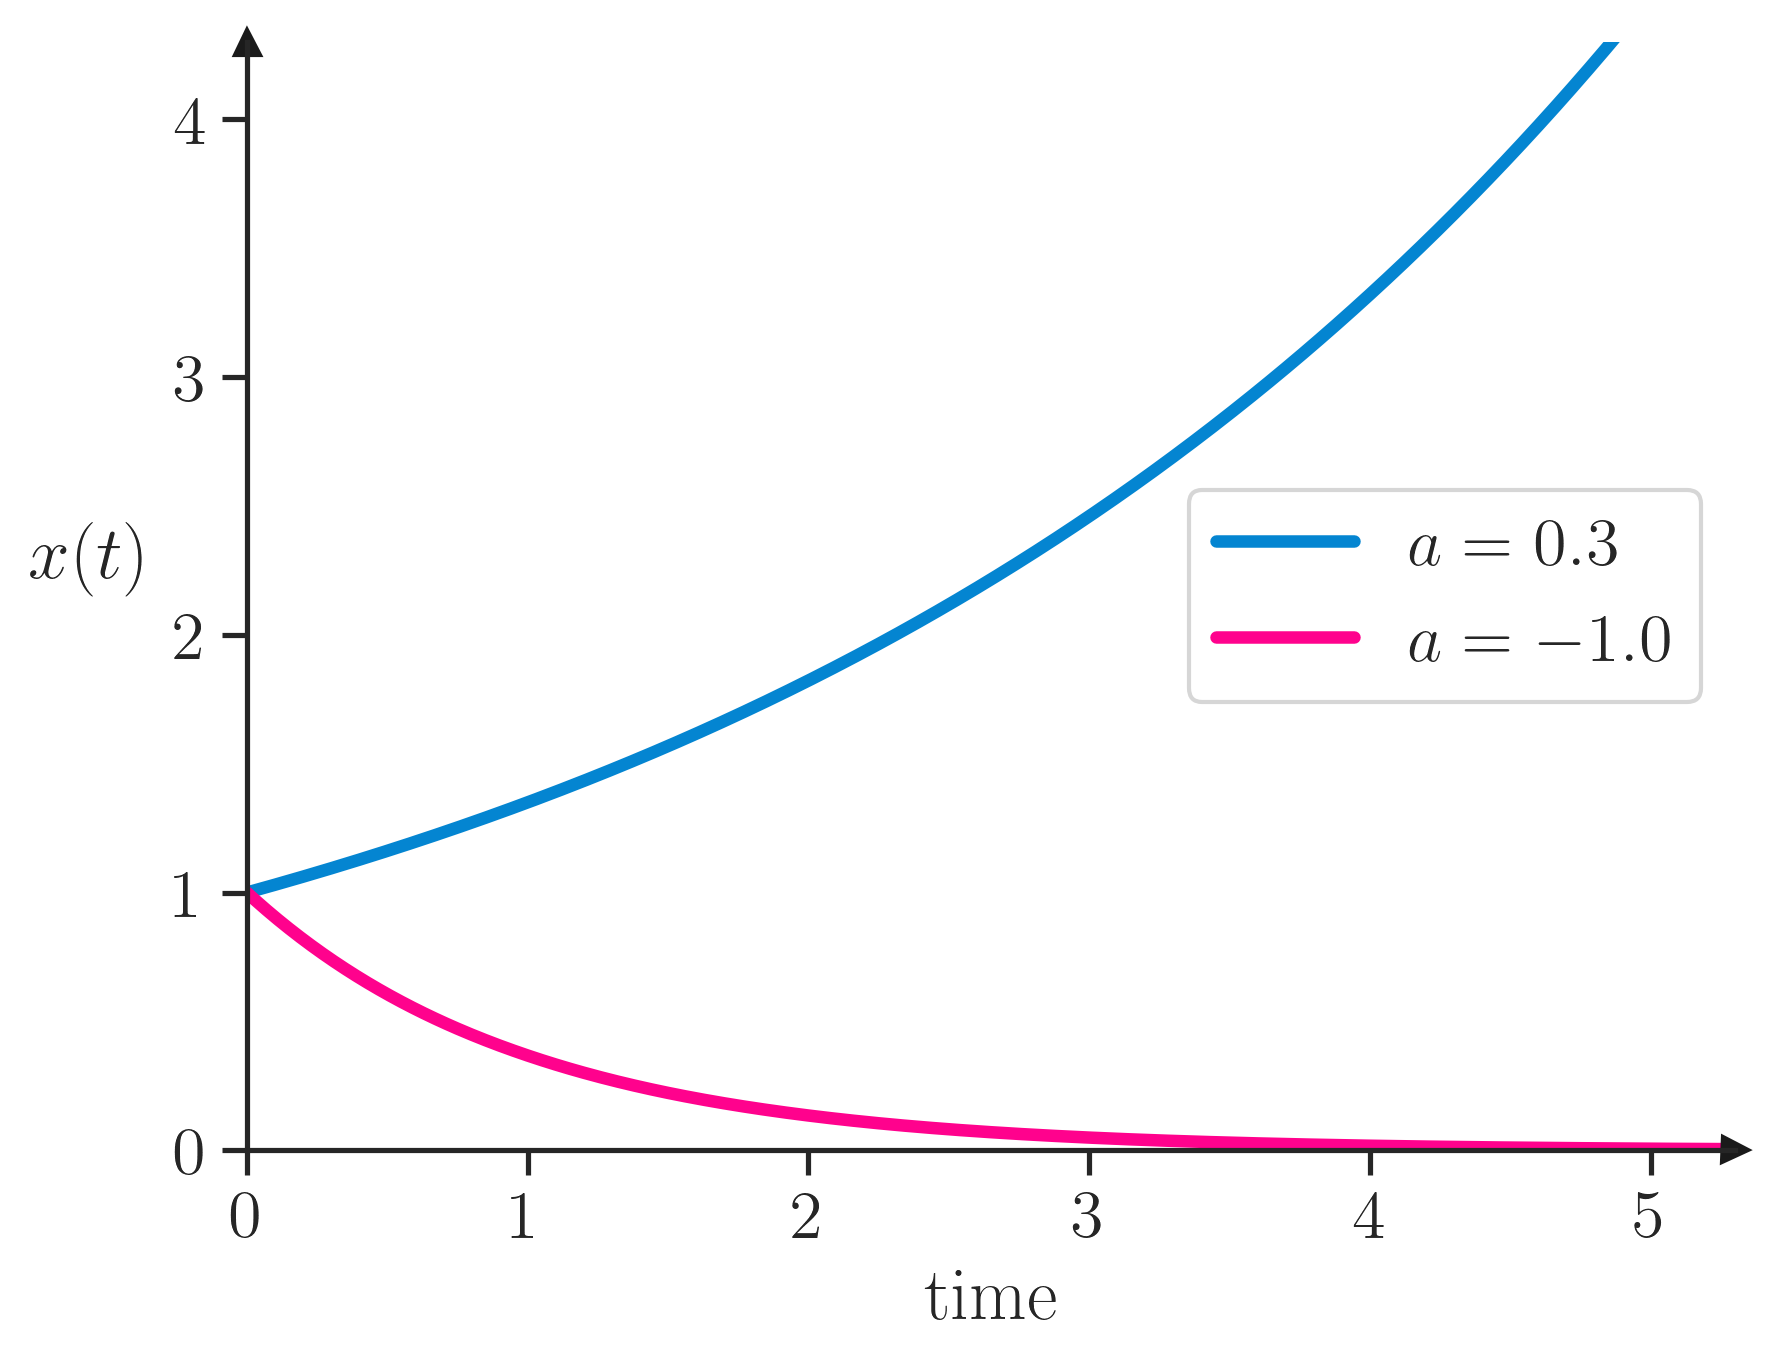

In [68]:
#| code-summary: "now let's plot"

# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {
          'font.family': 'serif',
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          # include here any neede package for latex
          'text.latex.preamble': r'\usepackage{amsmath}',
          'figure.dpi': 300
          }
plt.rcParams.update(params)
# matplotlib.rcParams['text.latex.preamble'] = [
#     r'\usepackage{amsmath}',
#     r'\usepackage{mathtools}']

fig, ax = plt.subplots()

bright_color1 = "xkcd:hot pink"
bright_color2 = "xkcd:cerulean"

ax.plot(sol2.t, sol2.y[0], color=bright_color2, lw=3, label=f'$a={a2}$')
ax.plot(sol1.t, sol1.y[0], color=bright_color1, lw=3, label=f'$a={a1}$')


ax.legend(loc='center right')
ax.set(xlim=[0,5.3],
       ylim=[0,4.3],
       xlabel='time',)
ax.set_ylabel(r'$x(t)$', labelpad=20, rotation=0)
# only left and bottom spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

## the simplest 2d dynamical system


\begin{align*}
\frac{dx_1}{dt} &= ax_1 + bx_2 \\
\frac{dx_2}{dt} &= cx_1 + dx_2
\end{align*}

...or in matrix form:

$$
\frac{d\mathbf{x}}{dt} = M \mathbf{x},
$$
where $\mathbf{x}=(x_1,x_2)$ and $M = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$.


In [69]:
#| code-summary: "system of equations"

def system_equations_2d(p, x, y):
    return [p['a'] * x + p['b'] * y,
            p['c'] * x + p['d'] * y,
           ]

# parameters as a dictionary
A0 = {'a': -1.0, 'b': +0.0,
      'c': +0.0, 'd': -2.0}
A1 = {'a': -1.0, 'b': +1.0,
      'c': +0.0, 'd': -2.0}
A2 = {'a': -1.0, 'b': +10,
      'c': +0.0, 'd': -2.0}

In [70]:
#| code-summary: "prepare streamplot and trajectories"

min_x, max_x = [-3, 3]
min_y, max_y = [-3, 3]
div = 50
X, Y = np.meshgrid(np.linspace(min_x, max_x, div),
                   np.linspace(min_y, max_y, div))

# given initial conditions (x0,y0), simulate the trajectory of the system as ivp
def simulate_trajectory(p, x0, y0, tmax=10, dt=0.01):
    t_eval = np.arange(0, tmax, dt)
    sol = solve_ivp(lambda t, y: system_equations_2d(p, y[0], y[1]),
                    [0, tmax], [x0, y0], t_eval=t_eval)
    return sol

t0a = simulate_trajectory(A0, 0, 1, 100)
t0b = simulate_trajectory(A0, 1, 0, 100)
t0c = simulate_trajectory(A0, 1, 1, 100)
t1 = simulate_trajectory(A1, 0, 1, 100)
t2 = simulate_trajectory(A2, 0, 1, 100)

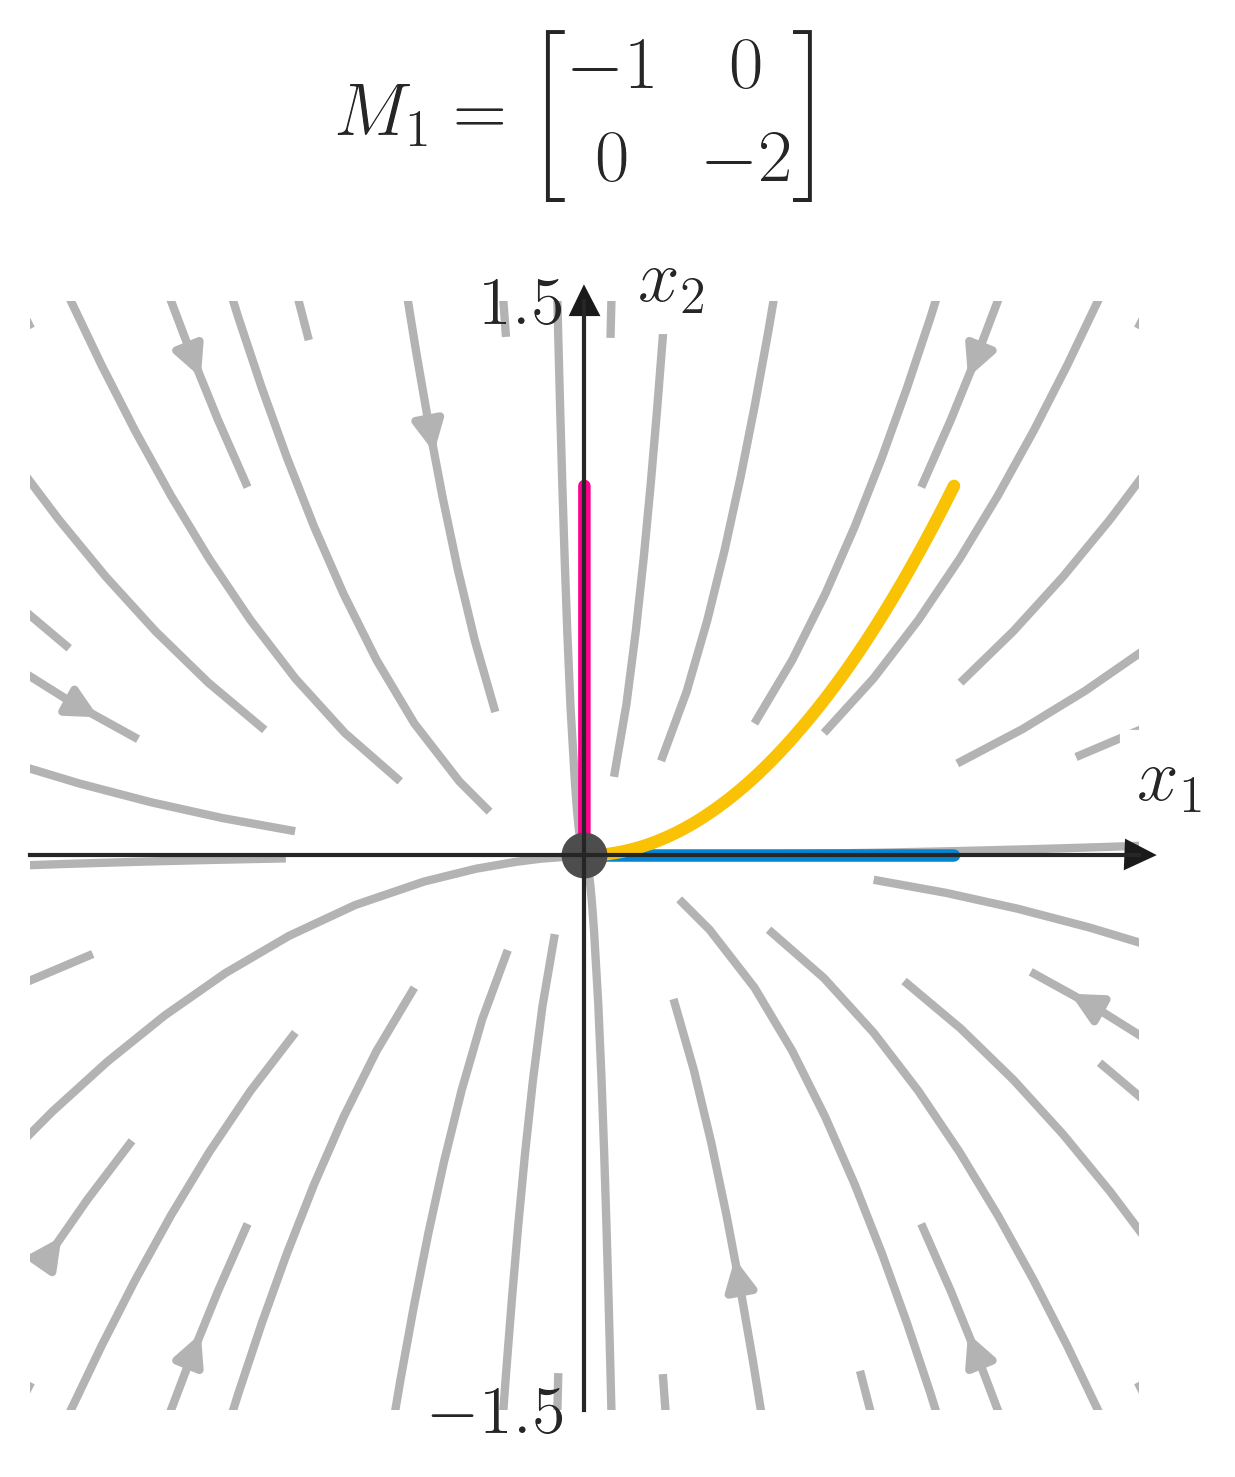

In [71]:
#| code-summary: "now let's plot"

fig, ax = plt.subplots()

density = 2 * [1.0]
minlength = 0.05
arrow_color = 3 * [0.7]
bright_color1 = "xkcd:hot pink"
bright_color2 = "xkcd:cerulean"
bright_color3 = "xkcd:goldenrod"

# make sure that each axes is square
ax.set_aspect('equal', 'box')
ax.streamplot(X, Y, system_equations_2d(A0, X, Y)[0], system_equations_2d(A0, X, Y)[1],
              density=density, color=arrow_color, arrowsize=1.5,
              linewidth=2,
              minlength=minlength,
              zorder=-10
              )
ax.plot(t0a.y[0], t0a.y[1], color=bright_color1, lw=3)
ax.plot(t0b.y[0], t0b.y[1], color=bright_color2, lw=3)
ax.plot(t0c.y[0], t0c.y[1], color=bright_color3, lw=3)
ax.plot(t1.y[0][-1], t1.y[1][-1], 'o', color=3*[0.3], markersize=10)


# make spines at the origin, put arrow at the end of the axis
ax_list = [ax]
for axx in ax_list:
    axx.spines['left'].set_position('zero')
    axx.spines['bottom'].set_position('zero')
    axx.spines['right'].set_color('none')
    axx.spines['top'].set_color('none')
    axx.spines['left'].set_linewidth(1.0)
    axx.spines['bottom'].set_linewidth(1.0)
    axx.xaxis.set_ticks_position('bottom')
    axx.yaxis.set_ticks_position('left')
    axx.xaxis.set_tick_params(width=0.5)
    axx.yaxis.set_tick_params(width=0.5)
    # put arrow at the end of the axis
    axx.plot(1, 0, ">k", transform=axx.get_yaxis_transform(), clip_on=False)
    axx.plot(0, 1, "^k", transform=axx.get_xaxis_transform(), clip_on=False)
    axx.text(1, 0.55, r"$x_1$", transform=axx.transAxes, clip_on=False, bbox=dict(facecolor='white', edgecolor='white'))
    axx.text(0.55, 1, r"$x_2$", transform=axx.transAxes, clip_on=False, bbox=dict(facecolor='white', edgecolor='white'))
    # set limits
    axx.set(xticks=[-3,3],
                   yticks=[-1.5,1.5],
                   xlim=[-1.5, 1.5],
                   ylim=[-1.5, 1.5],)
    # remove ticks from both axes
    axx.tick_params(axis='both', which='both', length=0)

# put on title the respective parameters as matrix, use latex equation
# add pad to title to avoid overlap with x-axis
ax.set_title(r'$M_1=\begin{bmatrix} -1 & 0 \\ 0 & -2 \end{bmatrix}$', pad=40)
plt.savefig("2d_system_0.png")

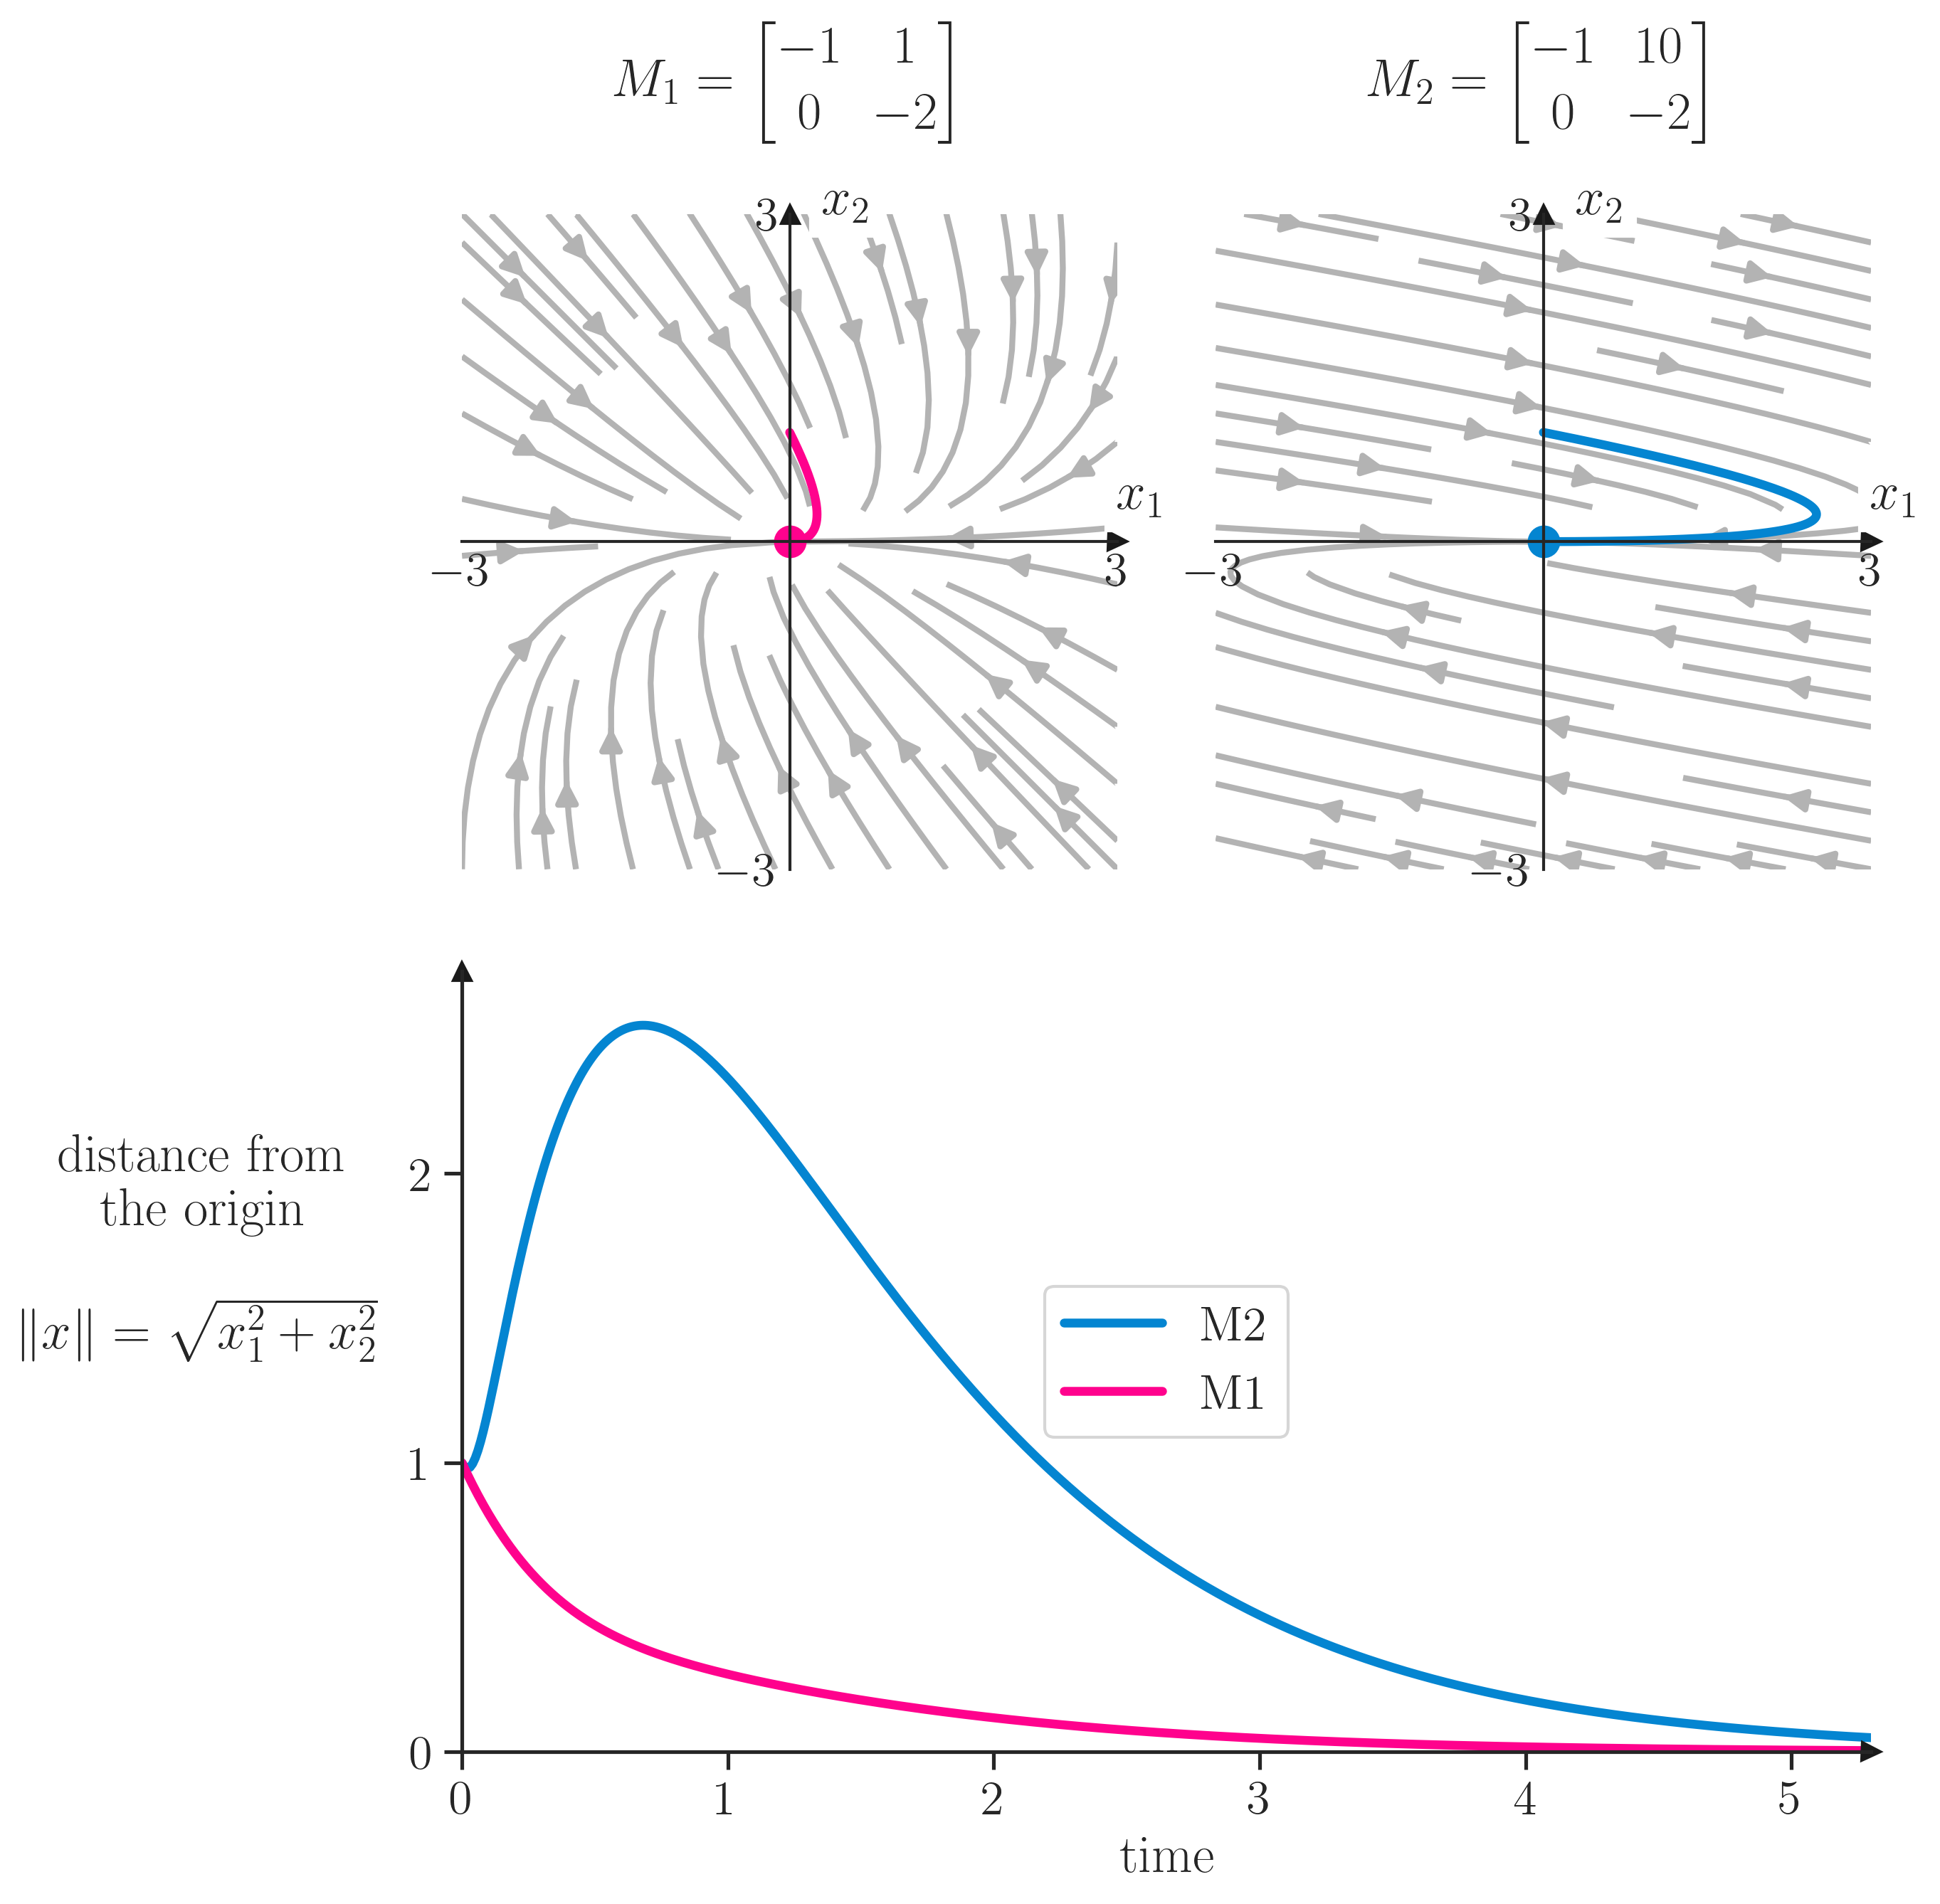

In [72]:
#| code-summary: "now let's plot"

# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {
          'font.family': 'serif',
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          # include here any neede package for latex
          'text.latex.preamble': r'\usepackage{amsmath}',
          }
plt.rcParams.update(params)
# matplotlib.rcParams['text.latex.preamble'] = [
#     r'\usepackage{amsmath}',
#     r'\usepackage{mathtools}']

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1])
gs.update(left=0.20, right=0.86,top=0.88, bottom=0.13, hspace=0.05, wspace=0.15)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, :])

density = 2 * [0.80]
minlength = 0.2
arrow_color = 3 * [0.7]
bright_color1 = "xkcd:hot pink"
bright_color2 = "xkcd:cerulean"

# make sure that each axes is square
ax0.set_aspect('equal', 'box')
ax1.set_aspect('equal', 'box')

ax0.streamplot(X, Y, system_equations_2d(A1, X, Y)[0], system_equations_2d(A1, X, Y)[1],
              density=density, color=arrow_color, arrowsize=1.5,
              linewidth=2,
              minlength=minlength,
              zorder=-10
              )
ax1.streamplot(X, Y, system_equations_2d(A2, X, Y)[0], system_equations_2d(A2, X, Y)[1],
              density=density, color=arrow_color, arrowsize=1.5,
              linewidth=2,
              minlength=minlength,
              zorder=-10
              )
ax0.plot(t1.y[0], t1.y[1], color=bright_color1, lw=3)
ax1.plot(t2.y[0], t2.y[1], color=bright_color2, lw=3)
ax0.plot(t1.y[0][-1], t1.y[1][-1], 'o', color=bright_color1, markersize=10)
ax1.plot(t2.y[0][-1], t2.y[1][-1], 'o', color=bright_color2, markersize=10)

# make spines at the origin, put arrow at the end of the axis
ax_list = [ax0, ax1]
for axx in ax_list:
    axx.spines['left'].set_position('zero')
    axx.spines['bottom'].set_position('zero')
    axx.spines['right'].set_color('none')
    axx.spines['top'].set_color('none')
    axx.spines['left'].set_linewidth(1.0)
    axx.spines['bottom'].set_linewidth(1.0)
    axx.xaxis.set_ticks_position('bottom')
    axx.yaxis.set_ticks_position('left')
    axx.xaxis.set_tick_params(width=0.5)
    axx.yaxis.set_tick_params(width=0.5)
    # put arrow at the end of the axis
    axx.plot(1, 0, ">k", transform=axx.get_yaxis_transform(), clip_on=False)
    axx.plot(0, 1, "^k", transform=axx.get_xaxis_transform(), clip_on=False)
    axx.text(1, 0.55, r"$x_1$", transform=axx.transAxes, clip_on=False, bbox=dict(facecolor='white', edgecolor='white'))
    axx.text(0.55, 1, r"$x_2$", transform=axx.transAxes, clip_on=False, bbox=dict(facecolor='white', edgecolor='white'))
    # set limits
    axx.set(xticks=[-3,3],
                   yticks=[-3,3],
                   xlim=[-3, 3],
                   ylim=[-3, 3],)
    # remove ticks from both axes
    axx.tick_params(axis='both', which='both', length=0)

# put on title the respective parameters as matrix, use latex equation
# add pad to title to avoid overlap with x-axis
ax0.set_title(r'$M_1=\begin{bmatrix} -1 & 1 \\ 0 & -2 \end{bmatrix}$', pad=40)
ax1.set_title(r'$M_2=\begin{bmatrix} -1 & 10 \\ 0 & -2 \end{bmatrix}$', pad=40)

L2_one = np.sqrt(t1.y[0]**2 + t1.y[1]**2)
L2_two = np.sqrt(t2.y[0]**2 + t2.y[1]**2)


# bottom plot
ax2.plot(t2.t, L2_two, color=bright_color2, lw=3, label='M2')
ax2.plot(t1.t, L2_one, color=bright_color1, lw=3, label='M1')
ax2.legend(loc='center')
ax2.set(xlim=[0,5.3],
        ylim=[0,2.7],
        yticks=[0,1,2],
        xlabel='time',)
ax2.set_ylabel('distance from\nthe origin\n\n' + r"$\lVert x\rVert =\sqrt{x_1^2+x_2^2}$", labelpad=70, rotation=0)
# only left and bottom spines
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')

ax2.plot(1, 0, ">k", transform=ax2.get_yaxis_transform(), clip_on=False)
ax2.plot(0, 1, "^k", transform=ax2.get_xaxis_transform(), clip_on=False)

The solution of the system of equation goes as follows:

$$
\frac{d\mathbf{x}}{dt} = M \mathbf{x} \Rightarrow \mathbf{x}(t) = e^{Mt} \mathbf{x}_0
$$

Now we need to compute the matrix exponential $e^{Mt}$.
If $M$ is diagonalizable, then $M = PDP^{-1}$, where $D$ is a diagonal matrix with the eigenvalues of $M$ on the diagonal and $P$ is the matrix whose columns are the eigenvectors of $M$:

\begin{align*}
e^{Mt} =&  e^{\left(PDP^{-1}\right)t} \\
       =& P e^{Dt} P^{-1} \\
       =& P \begin{pmatrix} e^{\lambda_1 t} & 0 \\ 0 & e^{\lambda_2 t} \end{pmatrix} P^{-1}
\end{align*}

::: {.column-margin}
Why do the $P$ matrices get off the exponential? Because

\begin{align*}
e^{Mt} &= I + PDP^{-1}t + \frac{1}{2!}PD^2P^{-1}t^2 + \ldots \\
       &= P \left( I + Dt + \frac{1}{2!}D^2t^2  \right)P^{-1} \\
       &= P e^{Dt} P^{-1}
\end{align*}

and it is easy to show that

$$
e^{Dt} = \begin{pmatrix} e^{\lambda_1 t} & 0 \\ 0 & e^{\lambda_2 t} \end{pmatrix}
$$

:::

Let's compute the eigenvalues $M$:

\begin{align*}
\text{det}(M - \lambda I) &= 0 \\
\text{det} \left[\begin{pmatrix} \lambda_1 & c \\ 0 & \lambda_2\end{pmatrix} - \begin{pmatrix} \lambda & 0 \\ 0 & \lambda\end{pmatrix} \right] &= 0 \\
\text{det} \begin{pmatrix} \lambda_1 - \lambda & c \\ 0 & \lambda_2 -\lambda\end{pmatrix} &= 0 \\
(\lambda_1 - \lambda)(\lambda_2 - \lambda) &= 0 \\
\text{therefore } \lambda &= \lambda_1 \text{ or } \lambda = \lambda_2
\end{align*}

Now the eigenvector of $\lambda_1$:

\begin{align*}
M \mathbf{v} &= \lambda_1 \mathbf{v} \\
\begin{pmatrix} \lambda_1 & c \\ 0 & \lambda_2 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} &= \lambda_1 \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} \\
\text{yielding } \lambda_1 v_1 + c v_2 &=  \lambda_1 v_1 \\
\lambda_2 v_2 &= \lambda_2 v_2 \\
\text{therefore } \mathbf{v} &= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
\end{align*}

Now the eigenvector of $\lambda_2$:

\begin{align*}
M \mathbf{u} &= \lambda_2 \mathbf{u} \\
\begin{pmatrix} \lambda_1 & c \\ 0 & \lambda_2 \end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix} &= \lambda_2 \begin{pmatrix} u_1 \\ u_2 \end{pmatrix} \\
\text{yielding } \lambda_1 u_1 + c u_2 &=  \lambda_2 u_1 \\
\lambda_2 u_2 &= \lambda_2 u_2 \\
\text{therefore } \mathbf{u} &= \begin{pmatrix} c \\ \lambda_2-\lambda_1 \end{pmatrix} \\
\end{align*}

Finally, we found that the matrix $P$ is:

$$
P = \begin{pmatrix} 1 & c \\ 0 & \lambda_2-\lambda_1 \end{pmatrix}
$$

We need $P^{-1}$, but it's not fun to compute inverse matrices. In the case where $\lambda_1=-1$ and $\lambda_2=-2$, we have:

$$
P = \begin{pmatrix} 1 & c \\ 0 & -1 \end{pmatrix}
$$

Now we're lucky, because it's easy to see that $P$ is its own inverse (it's called an involutory matrix):

$$
PP^{-1} = I \implies \begin{pmatrix} 1 & c \\ 0 & -1 \end{pmatrix}\begin{pmatrix} 1 & c \\ 0 & -1 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}_\blacksquare
$$

Finally, we have:

\begin{align*}
\mathbf{x}(t) &= \mathbf{x}_0 e^{Mt} = \begin{pmatrix} 1 & c \\ 0 & -1 \end{pmatrix} \begin{pmatrix} e^{-t} & 0 \\ 0 & e^{-2t} \end{pmatrix} \begin{pmatrix} 1 & c \\ 0 & -1 \end{pmatrix} \mathbf{x}_0 \\
              &= \begin{pmatrix} e^{-t} & ce^{-2t} \\ 0 & -e^{-2t} \end{pmatrix} \begin{pmatrix} 1 & c \\ 0 & -1 \end{pmatrix} \mathbf{x}_0 \\
              &= \begin{pmatrix} e^{-t} & ce^{-t}-ce^{-2t} \\ 0 & e^{-2t} \end{pmatrix} \mathbf{x}_0 \\
              &= \begin{pmatrix} e^{-t} & ce^{-t}-ce^{-2t} \\ 0 & e^{-2t} \end{pmatrix}  \begin{pmatrix} x_{01} \\ x_{02} \end{pmatrix} \\
       x_1(t) &= x_{01}\, e^{-t} + c\, x_{02} (e^{-t} - e^{-2t}) \\
       x_2(t) &= x_{02}\, e^{-2t}
\end{align*}


> The question arises whether asymptotic behavior adequately characterizes the response to perturbations. Because of the short duration of many ecological experiments, transients may dominate the observed responses to perturbations. In addition, transient responses may be at least as important as asymptotic responses. Managers charged with ecosystem restoration, for example, are likely to be interested in both the short-term and long-term effects of their manipulations, particularly if the short-term effects can be large.

[Source: Neubert & Caswell, 1997, *Ecology*](https://doi.org/10.1890/0012-9658(1997)078[0653:ATRFMT]2.0.CO;2)

## Reactivity

Source: [Neubert, M. G., & Caswell, H. (1997). Alternatives to resilience for measuring the responses of ecological systems to perturbations. Ecology, 78(3), 653-665.](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/0012-9658%281997%29078%5B0653%3AATRFMT%5D2.0.CO%3B2?casa_token=SyiEI6b6nDcAAAAA%3ArbkR9kXMWlBDebTjdWoGrxpcM_YTn_8mkLL91Qzw4yGEJeijYSEvHW8JNZK-K-9kAKr9RWuYyHsVeTST)

The reactivity is defined as the (normalized) maximum rate of change of the norm of the state vector $\mathbf{x}$, for all nonzero initial conditions:

$$
\sigma \equiv \max_{x_0\neq0} \left[ \left( \frac{1}{\lVert\mathbf{x}\rVert} \frac{d\lVert\mathbf{x}\rVert}{dt} \right)\Bigg|_{t=0} \right]
$$

Let's play with this definition and see what we get.

\begin{align*}
\frac{d\lVert\mathbf{x}\rVert}{dt} &= \frac{d\sqrt{\mathbf{x}^T\mathbf{x}}}{dt} \\
                                   &= \frac{1}{2}\left( \mathbf{x}^T\mathbf{x} \right)^{-1/2} \frac{d}{dt}\left(\mathbf{x}^T\mathbf{x}\right) \\
                                   &= \frac{1}{2\lVert\mathbf{x}\rVert}\left[ \mathbf{x}^T \frac{d\mathbf{x}}{dt} + \left(\frac{d\mathbf{x}}{dt}\right)^T \mathbf{x} \right] \\
                                   &= \frac{\mathbf{x}^T A \mathbf{x} + \mathbf{x}^T A^T \mathbf{x}}{2\lVert\mathbf{x}\rVert} \\
                                   &= \frac{\mathbf{x}^T \left( A + A^T \right) \mathbf{x}}{2\lVert\mathbf{x}\rVert}
\end{align*}

The matrix

$$
H(A) = \frac{A + A^T}{2}
$$

is called the Hermitian (symmetric) part of $A$.

The reactivity is then
$$
\sigma = \max_{\mathbf{x}\neq0} \left[ \frac{\mathbf{x}^T H(A) \mathbf{x}}{\lVert\mathbf{x}\rVert^2} \right]_{t=0}
$$

$$
\sigma = \lambda_{\text{max}}(H(A))
$$